In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Pre-processing

In [31]:
df = pd.read_csv('./drive/My Drive/MLstart/Gender/gender_classification_v7.csv',)
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [32]:
from sklearn.preprocessing import LabelEncoder
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, auc, precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [34]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Modelling

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [36]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', SVC())])

param = {
    'scaler__with_mean':[True, False],
    'scaler__with_std':[True, False],
    'clf__C':[1,3,5,7,10],
    'clf__degree':[1,2,3],
    'clf__gamma':['scale','auto'],
    'clf__kernel':['rbf','linear']
}

grid = GridSearchCV(pipe, param, cv=5, scoring='f1_macro', verbose=1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

print(grid.best_params_)
print(grid.best_score_)
print(f1_score(y_test, y_pred))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'clf__C': 7, 'clf__degree': 1, 'clf__gamma': 'auto', 'clf__kernel': 'rbf', 'scaler__with_mean': True, 'scaler__with_std': False}
0.9739970273391403
0.9691991786447639


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

scaler = StandardScaler(with_mean=True, with_std=False).fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

model_svc = SVC(C=3, degree=1, gamma='auto').fit(x_train_scaled, y_train)
y_pred = model_svc.predict(x_test_scaled)

print('accuracy score svc model = {}'.format(accuracy_score(y_test, y_pred).round(3)))
print('precision score svc model = {}'.format(precision_score(y_test, y_pred).round(3)))
print('recall score svc model = {}'.format(recall_score(y_test, y_pred).round(3)))
print('f1 macro score svc model = {}'.format(f1_score(y_test, y_pred).round(3)))

accuracy score svc model = 0.969
precision score svc model = 0.975
recall score svc model = 0.961
f1 macro score svc model = 0.968


In [40]:
X_scaled = StandardScaler(with_mean=True, with_std=False).fit_transform(df.iloc[:, :-1].values)

print('cv 5x score = {}'.format(cross_val_score(model_svc, X_scaled, y, scoring='f1_macro', cv=5)))
print('mean = {}'.format(cross_val_score(model_svc, X_scaled, y, scoring='f1_macro', cv=5).mean()))

cv 5x score = [0.96003801 0.96799539 0.98399974 0.9739949  0.9809977 ]
mean = 0.9734051489735371


In [41]:
precision, recall, threshold1 = precision_recall_curve(y_test, y_pred)
fpr, tpr, threshold2 = roc_curve(y_test, y_pred)

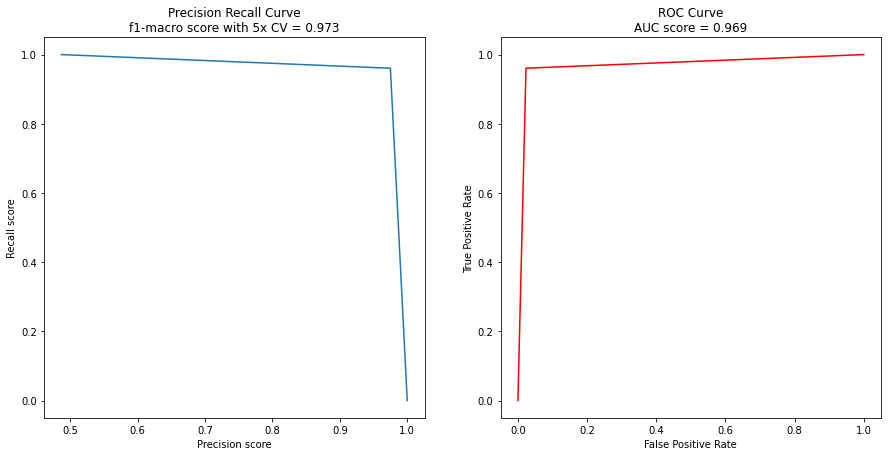

In [42]:
closest_zero = np.argmin(np.abs(threshold1))
precision_closest_zero = precision[closest_zero]
recall_closest_zero = recall[closest_zero]

fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot(precision, recall)
ax[0].set_xlabel('Precision score')
ax[0].set_ylabel('Recall score')
ax[0].set_title('Precision Recall Curve\nf1-macro score with 5x CV = {}'
.format(cross_val_score(model_svc, X, y, scoring='f1_macro', cv=5).mean().round(3)))

ax[1].plot(fpr, tpr, c='r')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve\nAUC score = {}'.format(auc(fpr,tpr).round(3)))

plt.show()